In [2]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Clustering is the statical operation that consists in grouping objects (individuals or variables) into a limited number of groups (classes/segments/clusters), which have 2 properties. On the one hand, they are not predefined *ex ante* but discovered during the operation, in constrast with classes in a classification problem. On the other hand, classes in a classification problem group objects which have similar characteristics and separate objects having different characteristics (internal homogeneity and external heterogeneity), which can be measured by metrics such as inertia within a class or between classes.
In this notebook, we look into two approaches for clustering (KMeans and AgglomerativeClustering) applied to several datasets, including 'cities.csv', which contains average monthly temperatures across a sample of cities in France.

###Question 1



*   Apply KMeans on the *cities* dataset to obtain 3 clusters.
*   Create a graphical representation of the cities projected on the principal plan (lower 2D plane obtained by PCA). Cities belonging to a cluster should have a different color than the cities from other clusters.

With **X_pca** as the matrix of the data transformed by PCA, **labels** as the vector containing the names of the instances (here cities), and **clustering** being the clustering obtained.  
Use the following code for the visualization:

```
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()
```



In [3]:
df = pd.read_csv('cities.csv')

In [4]:
df.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets


X = df.loc[:,df.columns != 'ville']
k_means = KMeans(n_clusters=3).fit(X)
clustering = k_means.predict(X)

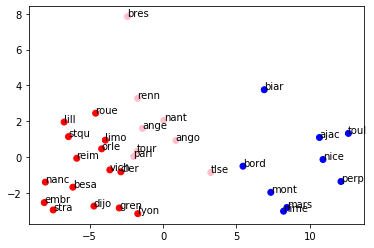

In [6]:
from sklearn.decomposition import PCA
import matplotlib

X = df.loc[:,df.columns != 'ville']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
labels = df['ville']
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Question 2

*   Apply AgglomerativeClustering to the dataset to obtain 3 clusters with different methods of aggregation (**ward**, **average** et **single**). 
    Each time provide a graphical representation of the cities projected on the lower dimension 2D plane.

*   Each time provide a graphical representation of the cities projected on the lower dimension 2D plane.
*   Explain what the different methods of aggregation are.


In [7]:
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
X_normalized = normalize(X_scaled) 

X_normalized = pd.DataFrame(X_normalized) 

In [8]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

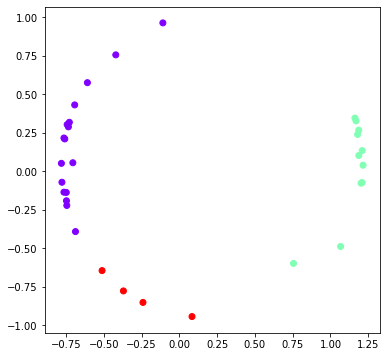

In [9]:
from sklearn.cluster import AgglomerativeClustering

ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

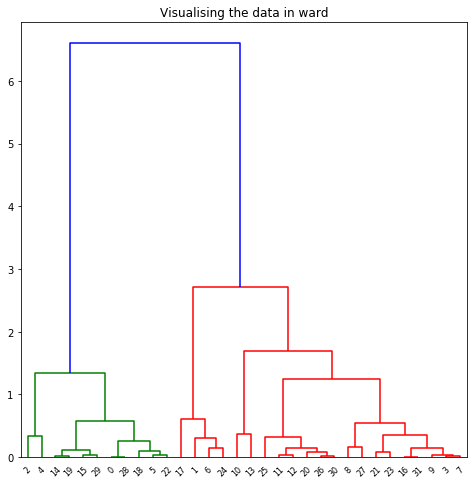

In [10]:
import scipy.cluster.hierarchy as shc 

plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data in ward') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

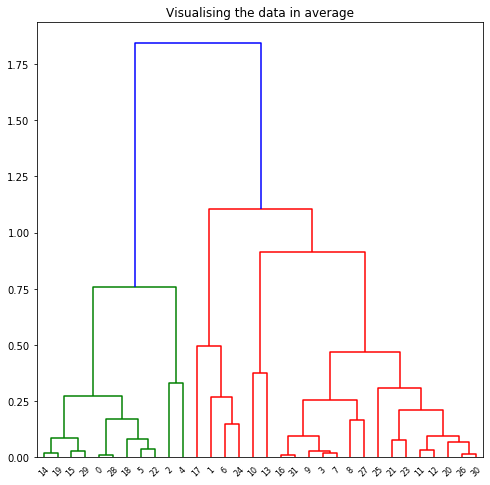

In [11]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data in average') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='average'))) 

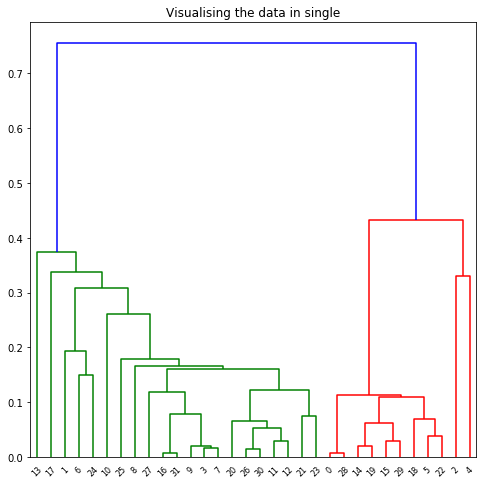

In [12]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data in single') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='single'))) 

So, when linkage is single, it means the distance to be compared is the minimum distance between element pairs.

When linkage is average, the distance between groups is equal to the average distance between two groups of objects.

When linkage is ward, it minimize the sum of squared differences in all clusters. This is a variance-minimizing method. At this point, it is similar to the objective function of k-means, but it uses the agglomerative hierarchical method.

We are now going to determine which is the best partition (number of clusters) for the **KMeans** method. To do so, we use the Silhouette Index metrics (see course notebook).

### Question 3


*   Perform a **KMeans** using different values for k (2 to 6) and determine which one 
corresponds to the best silhouette index.

In [13]:
k_list = [2,3,4,5,6]
X = df.loc[:,df.columns != 'ville']

for k in k_list:

    k_means = KMeans(n_clusters=k).fit(X)
    y = k_means.predict(X)

    print("When k is ",k , ", Silhouette Score is", metrics.silhouette_score(X, y, metric='euclidean'))

When k is  2 , Silhouette Score is 0.6181156437258204
When k is  3 , Silhouette Score is 0.40912000832289414
When k is  4 , Silhouette Score is 0.36123978527134804
When k is  5 , Silhouette Score is 0.33116954226736833
When k is  6 , Silhouette Score is 0.32574665143160947


### Question 4

*   What are the advantages and drawbacks of KMeans and of AgglomerativeClustering

KMeans Advantages:
    
Relatively simple to implement.
Scales to large data sets.
Can warm-start the positions of centroids.
Easily adapts to new examples.
Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

KMeans Drawbacks:
    
Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering.
As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples. Reduce dimensionality either by using PCA on the feature data, or by using “spectral clustering” to modify the clustering algorithm as explained below.



AgglomerativeClustering Advantages:

We do not need to specify the number of clusters required for the algorithm.
AgglomerativeClustering is easy to implement.
The dendrogram produced is very useful in understanding the data.

AgglomerativeClustering Drawbacks:

The algorithm can never undo any previous steps. So for example, the algorithm clusters 2 points, and later on we see that the connection was not a good one, the program cannot undo that step.
Use of different distance metrics for measuring distances between clusters may generate different results. Performing multiple experiments and comparing the results is recommended to support the veracity of the original results.

### Question 5

*   Propose a method which allows us to combine the advantages of both hierarchical and partitional clustering. We call such approach a hybrid clustering.
*   Propose a visualization of the cities to compare to results obtained in previous questions.

In [42]:
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_principal)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(X_principal, labels, metric='euclidean'))

In [43]:
Sil_coefs2 = []
for k in range(2,20):
    ac = AgglomerativeClustering(n_clusters = k)
    ac.fit(X)
    labels = ac.labels_
    Sil_coefs2.append(metrics.silhouette_score(X, labels, metric='euclidean'))

([<matplotlib.axis.XTick at 0x1a2130e518>,
 <a list of 18 Text xticklabel objects>)

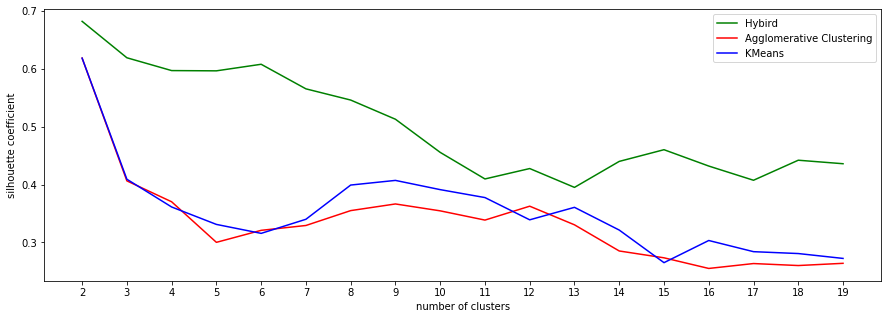

In [44]:
Sil_coefs3 = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    labels = km.labels_
    Sil_coefs3.append(metrics.silhouette_score(X, labels, metric='euclidean'))
fig, ax1 = plt.subplots(1,1, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs, color='green', label='Hybird')
ax1.plot(k_clusters, Sil_coefs2, color='red', label='Agglomerative Clustering')
ax1.plot(k_clusters, Sil_coefs3, color='blue', label='KMeans')
ax1.legend()
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')
plt.xticks(np.arange(2, 20, step=1))

Compared with the two algorithms, the hybird one is more adaptable to data distribution, and the clustering effect is also excellent. It is much smaller and even more commendable is that it is not complicated to implement. So I think combined the two algorithms mentioned above, it can includes their advantages. First of all, it scales to large data sets and generalizes to clusters of different shapes and sizes, such as elliptical clusters. Secondly, the similarity of distance and rules is easy to define, with few restrictions, just like hierarchical clustering.

### Question 6


*   Apply the function to the 2 datasets "wdbc.csv" and "spamb.csv"



In [17]:
df2 = pd.read_csv('wdbc.csv')

In [18]:
X2 = df2

In [19]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X2) 
  
X_normalized = normalize(X_scaled) 

X_normalized = pd.DataFrame(X_normalized)

In [20]:
pca = PCA(n_components = 2) 
X_principal2 = pca.fit_transform(X_normalized) 
X_principal2 = pd.DataFrame(X_principal2) 
X_principal2.columns = ['P1', 'P2'] 

In [34]:
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_principal2)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(X_principal2, labels, metric='euclidean'))

In [35]:
Sil_coefs2 = []
for k in range(2,20):
    ac = AgglomerativeClustering(n_clusters = k)
    ac.fit(X2)
    labels = ac.labels_
    Sil_coefs2.append(metrics.silhouette_score(X2, labels, metric='euclidean'))

([<matplotlib.axis.XTick at 0x1a21747cc0>,
 <a list of 18 Text xticklabel objects>)

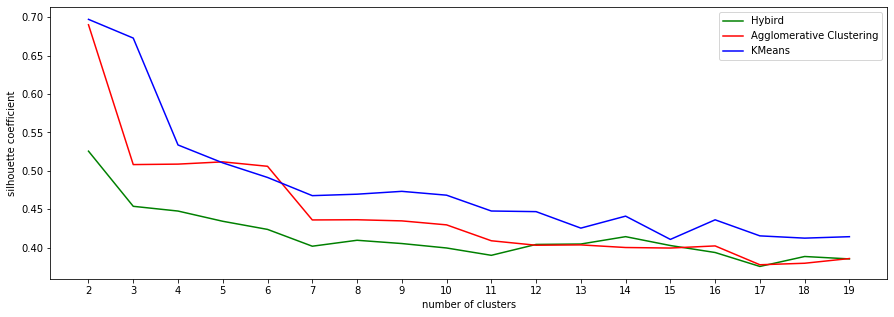

In [36]:
Sil_coefs3 = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X2)
    labels = km.labels_
    Sil_coefs3.append(metrics.silhouette_score(X2, labels, metric='euclidean'))
fig, ax1 = plt.subplots(1,1, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs, color='green', label='Hybird')
ax1.plot(k_clusters, Sil_coefs2, color='red', label='Agglomerative Clustering')
ax1.plot(k_clusters, Sil_coefs3, color='blue', label='KMeans')
ax1.legend()
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')
plt.xticks(np.arange(2, 20, step=1))

In [27]:
df3 = pd.read_csv('spamb.csv')

In [28]:
X3 = df3

In [29]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X3) 
  
X_normalized = normalize(X_scaled) 

X_normalized = pd.DataFrame(X_normalized)

In [30]:
pca = PCA(n_components = 2) 
X_principal3 = pca.fit_transform(X_normalized) 
X_principal3 = pd.DataFrame(X_principal3) 
X_principal3.columns = ['P1', 'P2'] 

In [31]:
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_principal3)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(X_principal3, labels, metric='euclidean'))

In [32]:
Sil_coefs2 = []
for k in range(2,20):
    ac = AgglomerativeClustering(n_clusters = k)
    ac.fit(X3)
    labels = ac.labels_
    Sil_coefs2.append(metrics.silhouette_score(X3, labels, metric='euclidean'))

([<matplotlib.axis.XTick at 0x1a21a9c320>,
 <a list of 18 Text xticklabel objects>)

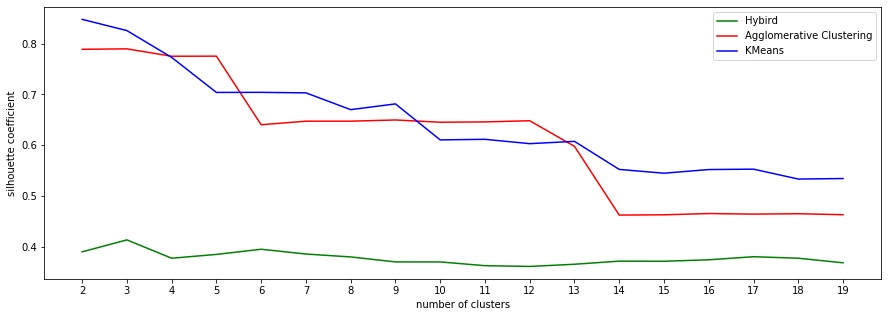

In [33]:
Sil_coefs3 = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X3)
    labels = km.labels_
    Sil_coefs3.append(metrics.silhouette_score(X3, labels, metric='euclidean'))
fig, ax1 = plt.subplots(1,1, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs, color='green', label='Hybird')
ax1.plot(k_clusters, Sil_coefs2, color='red', label='Agglomerative Clustering')
ax1.plot(k_clusters, Sil_coefs3, color='blue', label='KMeans')
ax1.legend()
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')
plt.xticks(np.arange(2, 20, step=1))